In [1]:
# Declaracion de librerias 
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#Preparacion de las etiquetas, el dataset, y cargado del modelo para generar los datos para la matriz
names = ['Carne 1','Carne 2','Carne 3','Carne 4','Carne 5','Carne 6','Carne 7','Carne 8']
test_data_dir = './CarneDataset/test'  
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(100, 100), 
    batch_size = 10,
    class_mode='categorical', 
    shuffle=False)
custom_Model= load_model("./modelo/model.h5")
predictions = custom_Model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_real = test_generator.classes

Found 810 images belonging to 8 classes.
81/81 [==============================] - 10s 125ms/step


In [7]:
#Creacion de la matriz de confucion
matc=confusion_matrix(y_real, y_pred)

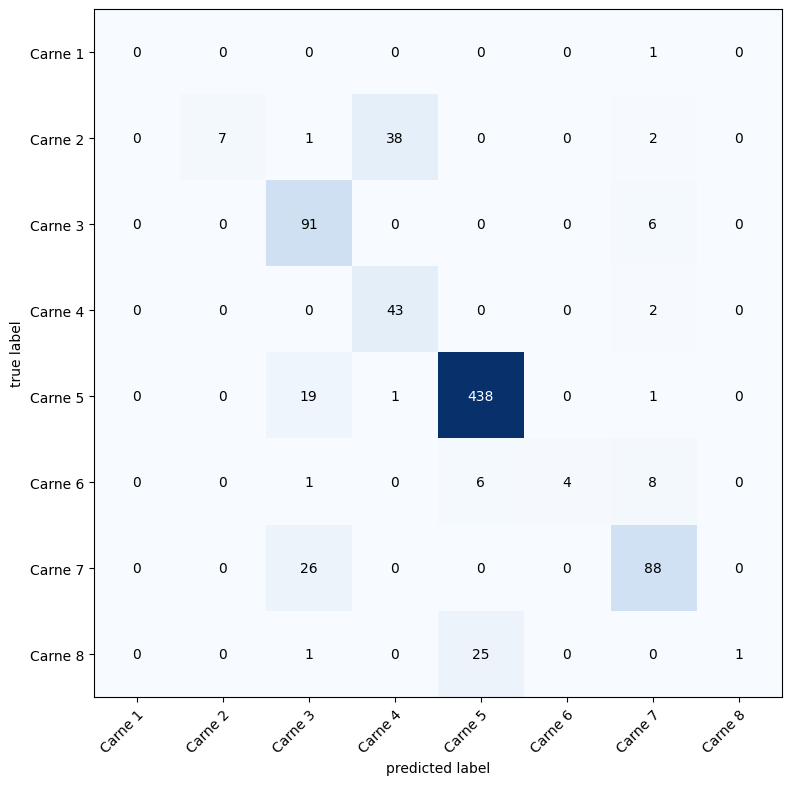

In [8]:
#Visualizacion de la matriz de confusion 
plot_confusion_matrix(conf_mat=matc, figsize=(8,8), class_names = names, show_normed=False)
plt.tight_layout()

In [9]:
#Impresion de metricas generadas por la matriz segun las clases existentes en el dataset
print(metrics.classification_report(y_real, y_pred, digits=1, zero_division=0))

              precision    recall  f1-score   support

           0        0.0       0.0       0.0         1
           1        1.0       0.1       0.3        48
           2        0.7       0.9       0.8        97
           3        0.5       1.0       0.7        45
           4        0.9       1.0       0.9       459
           5        1.0       0.2       0.3        19
           6        0.8       0.8       0.8       114
           7        1.0       0.0       0.1        27

    accuracy                            0.8       810
   macro avg        0.7       0.5       0.5       810
weighted avg        0.9       0.8       0.8       810

